# The PPOLs Model - Tutorial & Examples
Growing planetary systems with pebble snow.


Model planet formation via pebble snow by:

+ create a `Disk()` object (the protoplanetary disk), which predicts the pebble mass flux and flux-averaged Stokes number
+ create a `Seeds()` object (the planetesimal seed masses), and
+ use class function `Seeds.grow()` to grow the planetesimals and store outputs as attributes

This tutorial will present some simple examples of major parameters users might be interested in, with finer examples later. 

**For a full list of parameters, see the documentation [here](https://spmccloat.github.io/thePPOLSmodel/index.html).**

Begin by importing:

In [7]:
import thePPOLsCode as plc
import numpy as np
import matplotlib.pyplot as plt

### Example 1 - Simple System with Static Snow Line
This simple case will create a `Disk()` around a 1 solar mass star, a disk mass fraction (dmf) of 0.10 (gas + dust = 10% of stellar mass), and a snow line set at 3.5 au. By default, alpha = 10^-3 so we do not include it this time. The second line `disk.inspect()` is a convenience function to print basic information about the disk.

In [3]:
disk = plc.Disk(MSol=1.0, dmf=0.1, snowmode=3.5)
disk.inspect() #inspect(plots=True)

C:\Users\Sean\Documents\github\thePPOLsModel\src\PP.py:197: RuntimeWarning: overflow encountered in exp
  stini = st0 * np.exp(tgrid[it]/tgrowth[:])


Mstar = 1.0 MSol
Disk mass = 0.100 MSol / 33295 MEarth
Dust mass =  446 MEarth
SigmaGas/Dust at 1 AU = 4382 / 29 [g/cm^2]
Snowline = 3.50 au


`disk` contains many informative attributes, such as the stellar mass, disk mass, temperatue profile, and location of the snow line, e.g. `diskprime.MSol`, `diskprime.dmf`, `diskprime.snowline_au`. The attributes `disk.tgrid` and `disk.rgrid` provide the time and spatial dimension of the disk in cgs units (seconds and cm).

Next, we create planetesimal seed masses at the location of the solar system planets, with an initial mass ~Pluto at $10^{-3} M_{\oplus}$. We also need to specificy which `disk` object the seeds belong to. Finally, exectue `seeds.grow()` to make your planetary system:

In [4]:
seeds_au = np.array([0.4, 0.7, 1.0, 1.5, 5, 10, 20, 30, 40]) # locations, au
mass = 1e-3 # Earth masses

seeds = plc.Seeds(disk=disk, seeds_au=seeds_au, mass=mass)
seeds.grow()

A convenience plotting function exists to show the protoplanet masses, water mass fraction, snow line position, and pebble isolation mass:

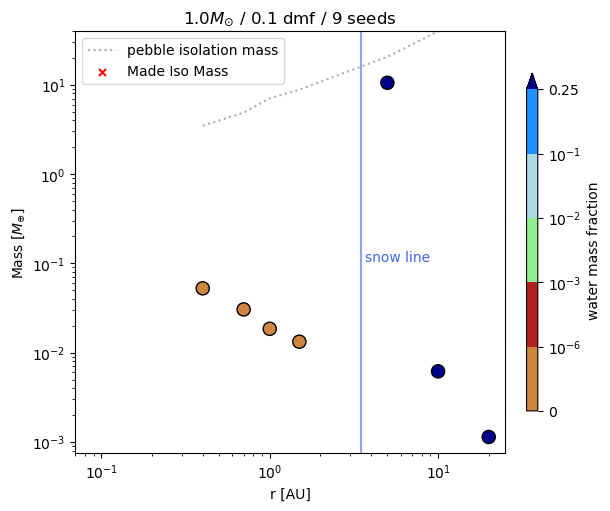

In [6]:
seeds.gtplot()

As with `Disk`, there are many attributes added to the `Seeds` object that are recorded and at each time step. By default, growth proceeds for 10 million years. Thus, growth tracks for each seed mass can be plotted using:

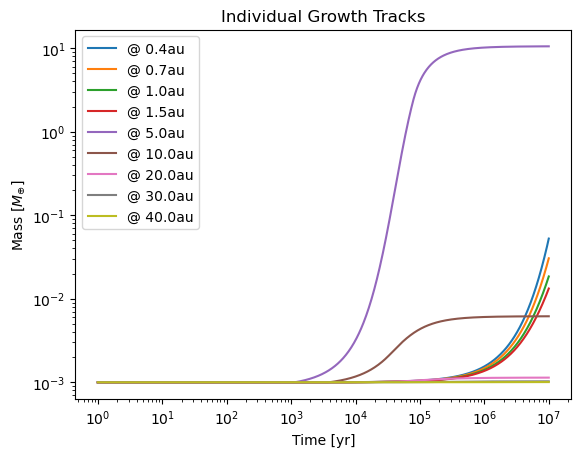

In [17]:
year = 365.25*24*3600
fig, ax = plt.subplots()
for i, s in enumerate(seeds_au):
    ax.plot(disk.tgrid/year, seeds.cumulmass[i], label='@ {:1.1f}au'.format(s))
ax.set(yscale='log', xscale='log', ylabel='Mass [$M_{\oplus}$]', xlabel='Time [yr]',
      title='Individual Growth Tracks')
ax.legend()

### Example 2 - Evolving Snow Line
Let's spice things up with another example - this time we will grow 80 seeds distributed exponentially from 0.5 to 120 AU, starting from $10^{-4} M_{\oplus}$, around a 0.5$M_{\odot}$ star, with an initial total disk mass fraction that is 1% of the stellar mass, and an **evolving** snow line.

To implement a snow line that is based off disk conditions, and that evolves as the dust converts into pebbles (see Equation 5 from McCloat et al. 2025), use `snowmode='evol'` during `Disk()` creation:


C:\Users\Sean\Documents\github\thePPOLsModel\src\PP.py:197: RuntimeWarning: overflow encountered in exp
  stini = st0 * np.exp(tgrid[it]/tgrowth[:])


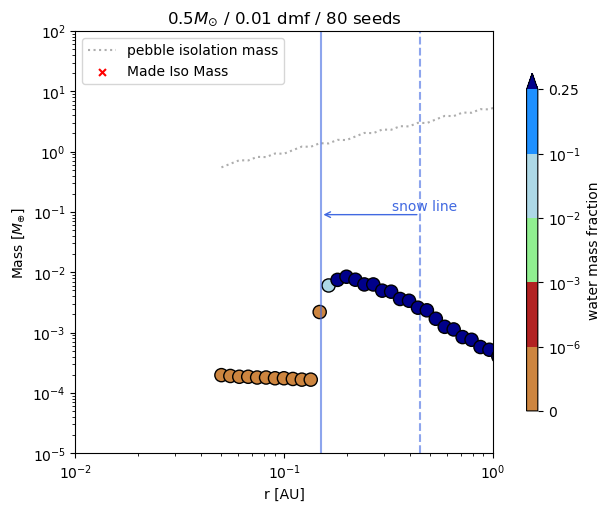

In [20]:
disk_2 = plc.Disk(MSol=0.5, dmf=0.01, snowmode='evol')
seeds_au_2 = np.geomspace(0.05, 120, 80)
mass_2 = 1e-4
seeds_2 = plc.Seeds(disk=disk_2, seeds_au=seeds_au_2, mass=mass_2)
seeds_2.grow()
seeds_2.gtplot(ylim=[1e-5,1e2], xlim=[0.01,1])

Notice how this time the starting and end locations of the snow line are marked with the light blue dashed --> solid line.
Notice also you can tweak the figure limits in the call to `gtplot()`.

### Example 3 - Explicit Solid Disk Mass & Staggered Formation Time
Some investigators may be interested in setting the solid disk mass explicitly instead of as a total fraction of the stellar mass. This is easily accomplished by setting `dmf > 1`: this will set initial solid dust mass, in Earth masses. Users can also adjust the dust-gas ratio of the disk using `z0`.

To change the introduction time of the seeds into the disk, i.e. planetesimal seed masses form later at greater distances, use the `Seeds` parameter `tintro=`. We can also set the initial mass of each planetesimal seed in the same way. Note these arrays need to be the same length as the location (`seeds_au`).

In this example, we will set the dust mass to 600 $M_{\oplus}$, the disk metallicity (dust-gas ratio) to 0.91, and stagger the introduction mass and formation time of the seeds:

C:\Users\Sean\Documents\github\thePPOLsModel\src\PP.py:197: RuntimeWarning: overflow encountered in exp
  stini = st0 * np.exp(tgrid[it]/tgrowth[:])
C:\Users\Sean\Documents\github\thePPOLsModel\src\PP.py:197: RuntimeWarning: overflow encountered in multiply
  stini = st0 * np.exp(tgrid[it]/tgrowth[:])
C:\Users\Sean\Documents\github\thePPOLsModel\src\thePPOLsCode.py:296: RuntimeWarning: invalid value encountered in power
  movein = movein**(1/6)  # CAREFUL: this is arbitrary


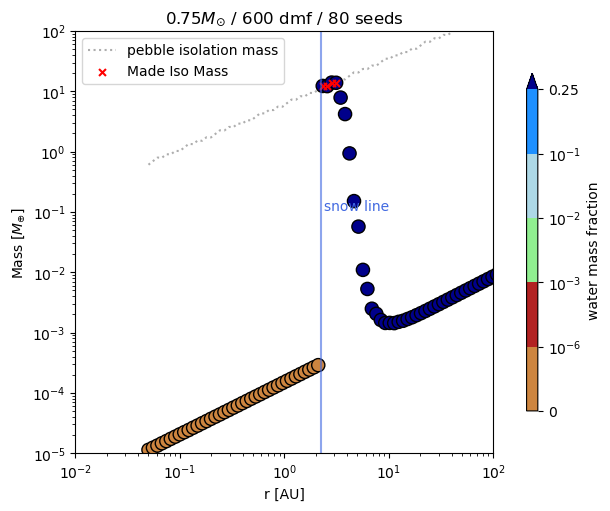

In [28]:
disk_3 = plc.Disk(MSol=0.75, dmf=600, z0=0.91, snowmode='temp')

n = 80  # the number of seeds
seeds_au_3 = np.geomspace(0.05, 120, n)
mass_3 = np.geomspace(1e-5, 1e-2, n)
tintro = np.geomspace(1e3, 5e5, n)
seeds_3 = plc.Seeds(disk=disk_3, seeds_au=seeds_au_3, mass=mass_3, tintro=tintro)

seeds_3.grow()
seeds_3.gtplot(ylim=[1e-5,1e2], xlim=[0.01,100])

In Example 3 above, we also used `snowmode='temp'` to flesh out its capability. In this example, several of the seeds just behind the snow line grew very efficiently and reached the pebble isolation mass. When this occurs, they will essentially block the iwnard flow of pebbles behind them and starve the inner seeds of growth.

### Other Parameters
`tempmode`: temperature, by default, the disk is set with a power law temperature profile. An alternate temperature profile from Ida et al. 2016 that accounts for viscous and irradiation heating is also available. Use `tempmode = 'ida2016'`.

The main functionality of the PPOLs Model is to enable flexible efficient planetary assembly via pebble snow, tracking the mass and water mass fraction of growing seed masses. Users can change the stellar mass, disk mass, snow line position in a variety of ways. Be sure to explore the docs for all the options and review the published paper McCloat et al. (2025).

Many useful physical parameters are available as attributes in the Disk or Seeds object, and most paramaters are recorded as functions of both radial position (au) and time. Please reach out to spmccloat@gmail.com with questions.